In [39]:
import numpy as np
import scipy.stats as stats
import pandas as pd

In [2]:
news = pd.read_csv("Data/final_news.csv")

/Users/marcuscorreia/opt/anaconda3/envs/fake_news/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
news.head(2)

,Unnamed: 0,Article_title,Article_body,Title_length,Body_length,Target,Number_of_tweets,corpus,corpus_length_original
0,4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,9.0,317.0,0.0,0.0,The Battle New York: Why This Primary Matters ...,205.0
1,13,"Trump takes on Cruz, but lightly","Killing Obama administration rules, dismantlin...",6.0,17.0,0.0,0.0,"Trump takes Cruz, lightly Killing Obama admini...",16.0


In [4]:
fake_news = news[news["Target"]==1]

In [5]:
fake_news.shape

(13103, 9)

In [6]:
real_news = news[news["Target"] == 0]

In [7]:
real_news.shape

(11481, 9)

In [8]:
# Check for outliers

<AxesSubplot:>

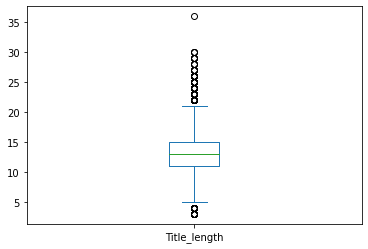

In [9]:
fake_news["Title_length"].plot.box()

In [10]:
# Values under 5 and above 20 are outliers

In [11]:
fake_news = fake_news[(fake_news["Title_length"] > 5) & (fake_news["Title_length"] < 20)]

In [12]:
fake_news.shape

(12562, 9)

<AxesSubplot:>

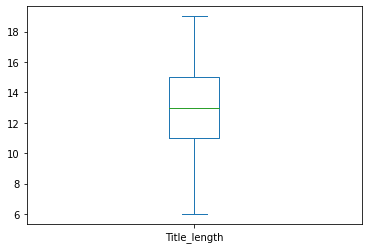

In [18]:
fake_news["Title_length"].plot.box()

<AxesSubplot:>

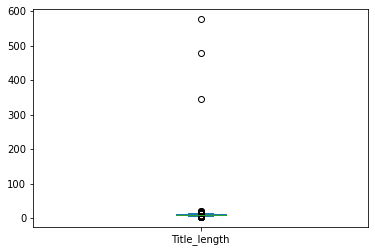

In [13]:
real_news["Title_length"].plot.box()

In [ ]:
# remove values over 100 and check again

In [14]:
real_news = real_news[real_news["Title_length"]<100]

<AxesSubplot:>

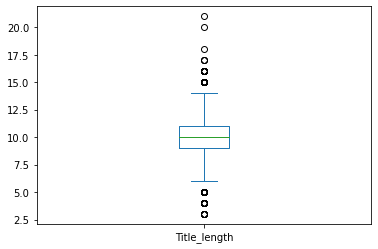

In [15]:
real_news["Title_length"].plot.box()

In [ ]:
# outliers are below 6 and above 15

In [16]:
real_news = real_news[(real_news["Title_length"]>6) & (real_news["Title_length"] < 15)]

<AxesSubplot:>

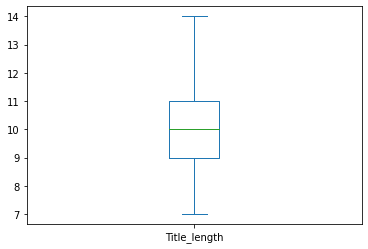

In [17]:
real_news["Title_length"].plot.box()

In [ ]:
# By looking at the shapre of the boxplots, it appears the data is now normally distributed. Will test with Shapiro Wilk test

In [48]:
from scipy.stats import shapiro

In [50]:
rstats, rp = shapiro(real_news["Title_length"])

In [53]:
rp < 0.05

True

In [ ]:
stats.levene(fake_news["Title_length"][fake_news["Title_length"]<100],real_news["Title_length"][real_news["Title_length"]<100])

In [ ]:
import statistics
statistics.variance(fake_news["Title_length"][fake_news["Title_length"]<100])/statistics.variance(real_news["Title_length"][real_news["Title_length"]<100])